## Fine-tuning the Tree Detection deep learning model

TreeDetection.dlpk cannot be fine-tuned using the ArcGIS Pro tools but it can be trained using Python (`arcgis.learn` module). This a simple proof-of-concept for how it can be done.<br /><br />The use case here is identification of young American Chestnut trees as a first step toward potentially using GeoAI to assist with restoration efforts (e.g. by monitoring tree health). For more see the [American Chestnut Foundation website](https://tacf.org). Imagery is of the Foundation's orchard in Meadowview, VA.<br /><br />Before running this script, create training data by using the Label Objects for Deep Learning tool (imagery > deep learning tools > label objects for deep learning) and then export the training data (from within the tool).


In [1]:
import arcgis.learn
import os
from arcgis.learn import prepare_data, RetinaNet

Define the path to the ESRI pre-trained Tree Detection model

In [3]:
model_path = r"C:\Users\vboxuser\Documents\ArcGIS\Projects\chestnuts\TreeDetection.dlpk"

Point to the to the exported labeled objects (training data). 

In [10]:
training_data_path = r"C:\Users\vboxuser\Documents\ArcGIS\Projects\chestnuts\LabeledObjects\meadowview_tif\202507112025591023563"

Define a path for the new model that will be generated by this script

In [11]:
output_model_path = r"C:\Users\vboxuser\Documents\ArcGIS\Projects\chestnuts\FineTuned_TreeDetection_Labeled"

Pepare the data for training (using a small batch size as a test `batch_size=3`). TreeDetection is based on PASCAL VOC {Visual Object Classes). 

In [12]:
data = prepare_data(training_data_path, dataset_type='PASCAL_VOC_rectangles', batch_size=3)

Output the batch to verify it. 

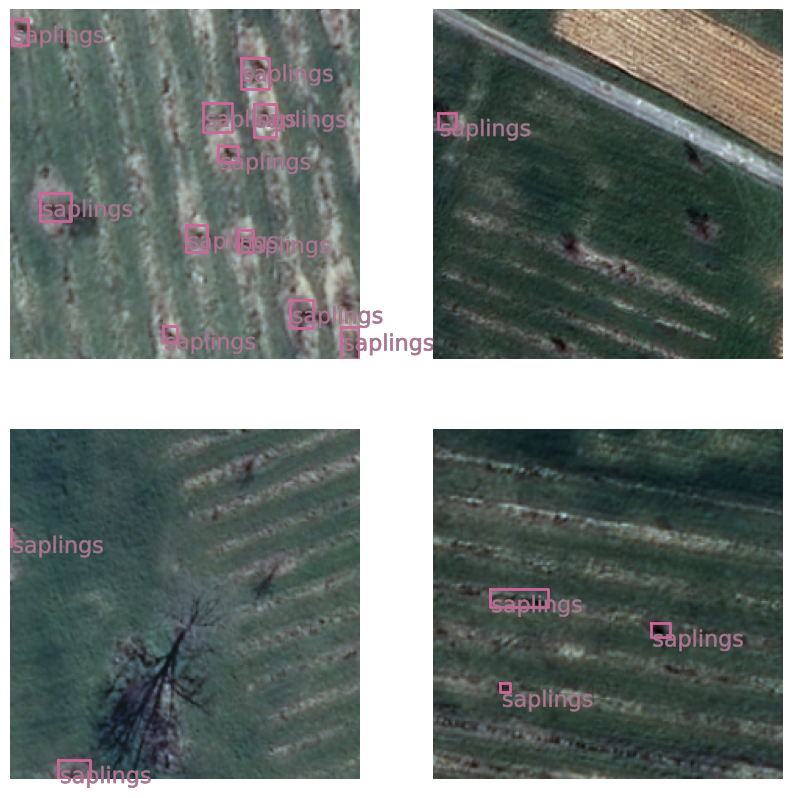

In [13]:
data.show_batch()

Define the new model (TreeDetection is bullt upon the RetinaNet deep learning object detection model)

In [14]:
model = RetinaNet(data)

Train the new model (as an initial test, just pass through 10 times with `epoch=10`)

In [15]:
model.fit(epochs=10, lr=0.001) 

epoch     train_loss  valid_loss  average_precision  time    
0         2.599787    11.267606   0.042328           00:31     
1         1.941925    0.642955    0.000000           00:31     
2         1.717502    2.565780    0.012346           00:34     
3         1.544878    130.915909  0.040088           00:30     
4         1.396875    0.771089    0.000000           00:47     
5         1.265224    0.660714    0.135802           00:35     
6         1.174771    0.641704    0.111111           00:32     
7         1.118029    0.576041    0.101852           00:32     
8         1.038067    1.457942    0.148148           00:37     
9         0.978732    2.016546    0.177778           00:38     


#### Output the new model

In [17]:
model.save(output_model_path)

WindowsPath('C:/Users/vboxuser/Documents/ArcGIS/Projects/chestnuts/FineTuned_TreeDetection_Labeled.dlpk')

Next, point to this new model in the Detect Ojbects Using Deep Learning tool and run it to evaluate results.

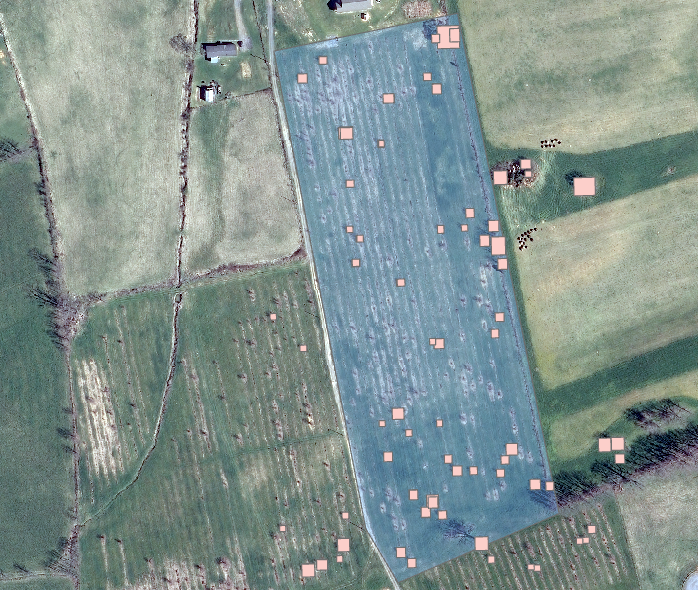

In [ ]:
TreeDetection on the left and fine-tuned TreeDetection (generated by the script above) on the right. 